# **Load Data**

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "chiahong95"
os.environ['KAGGLE_KEY'] = "9d00ef18884366e3c7ff9f5811029d66"
!kaggle competitions download -c ml2021spring-hw1
!unzip covid.train.csv.zip

  0% 0.00/635k [00:00<?, ?B/s]
100% 635k/635k [00:00<00:00, 41.3MB/s]
  0% 0.00/300k [00:00<?, ?B/s]
100% 300k/300k [00:00<00:00, 98.6MB/s]
  0% 0.00/7.76k [00:00<?, ?B/s]
100% 7.76k/7.76k [00:00<00:00, 7.69MB/s]
Archive:  covid.train.csv.zip
  inflating: covid.train.csv         


In [4]:
import numpy as np
import csv
tr_path = 'covid.train.csv'  # path to training data
tt_path = 'covid.test.csv'   # path to testing data

In [5]:
# Read data into numpy arrays
with open(tr_path, 'r') as fp:
  data = list(csv.reader(fp))
  data = np.array(data[1:])[:, 1:].astype(float)
  y_train = data[:, -1]
  x_train = data[:,0:93]

In [6]:
print('Train',x_train.shape,y_train.shape)

Train (2700, 93) (2700,)


In [7]:
with open(tt_path, 'r') as fp:
  data = list(csv.reader(fp))
  x_test = np.array(data[1:])[:, 1:].astype(float)
  x_test=x_test[:,0:93]

In [8]:
print('Test', x_test.shape)

Test (893, 93)


# **Correlation Feature Selection**

In [9]:
# example of correlation feature selection for numerical data
# from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

In [10]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 40: 6388.906849
Feature 41: 5998.922880
Feature 42: 9235.492094
Feature 43: 8395.421300
Feature 57: 69603.872591
Feature 58: 6374.548000
Feature 59: 5937.588576
Feature 60: 9209.019558
Feature 61: 8343.255927
Feature 75: 148069.658278
Feature 76: 6250.008702
Feature 77: 5796.947672
Feature 78: 9097.375172
Feature 79: 8208.176435
14


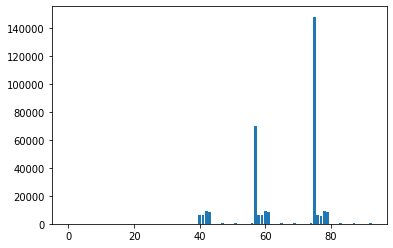

In [17]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(x_train, y_train, x_test)
# what are scores for the features
cnt=0
feats=[]
for i in range(len(fs.scores_)):
  if fs.scores_[i]>5000:
    cnt+=1    
    print('Feature %d: %f' %(i,fs.scores_[i]))
    feats.append(i)
print(cnt)
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [18]:
feats

[40, 41, 42, 43, 57, 58, 59, 60, 61, 75, 76, 77, 78, 79]

# **Mutual Information Feature Selection**

In [19]:
from sklearn.feature_selection import mutual_info_regression
# feature selection
def select_features2(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 40: 0.755304
Feature 41: 0.732602
Feature 42: 0.974405
Feature 43: 0.967452
Feature 57: 1.664437
Feature 58: 0.767739
Feature 59: 0.743958
Feature 60: 0.971686
Feature 61: 0.956409
Feature 75: 2.047018
Feature 76: 0.740318
Feature 77: 0.763468
Feature 78: 0.980129
Feature 79: 0.960309
14


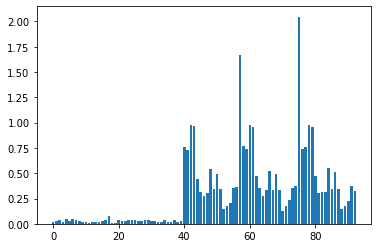

In [20]:
# feature selection
X_train_fs2, X_test_fs2, fs2 = select_features2(x_train, y_train, x_test)
# what are scores for the features
cnt=0
feats2=[]
for i in range(len(fs2.scores_)):
  if fs2.scores_[i]>0.60:
    cnt+=1
    feats2.append(i)
    print('Feature %d: %f' % (i, fs2.scores_[i]))
print(cnt)
# plot the scores
pyplot.bar([i for i in range(len(fs2.scores_))], fs2.scores_)
pyplot.show()

In [21]:
feats2

[40, 41, 42, 43, 57, 58, 59, 60, 61, 75, 76, 77, 78, 79]

# **Reference**

Perform Feature Selection for Regression Data: https://blog.csdn.net/weixin_39653948/article/details/110100062